# Detecting and Removing Outliers

In [1]:
# Importing the key software libraries

import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# Importing the dataset. Here using the white wine dataset:

wine_df = pd.read_csv('whitewine.csv')

wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,6.7,0.62,0.24,1.10,0.039,6.0,62.0,0.99340,3.41,0.32,10.400000,5,white
1,5.7,0.22,0.20,16.00,0.044,41.0,113.0,0.99862,3.22,0.46,8.900000,6,white
2,5.9,0.19,0.26,7.40,0.034,33.0,123.0,0.99500,3.49,0.42,10.100000,6,white
3,5.3,0.47,0.10,1.30,0.036,11.0,74.0,0.99082,3.48,0.54,11.200000,4,white
4,6.4,0.29,0.21,9.65,0.041,36.0,119.0,0.99334,2.99,0.34,10.933333,6,white


In [3]:
# Here we will focus on just the residual sugar variable:
wine_df['residual sugar'].describe()

count    4898.000000
mean        6.391415
std         5.072058
min         0.600000
25%         1.700000
50%         5.200000
75%         9.900000
max        65.800000
Name: residual sugar, dtype: float64

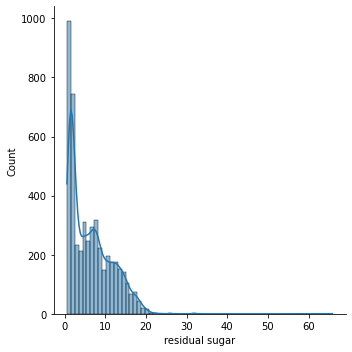

In [4]:
# Plotting the distribution of the variable:

sns.displot(wine_df['residual sugar'], kde = True)

<AxesSubplot:>

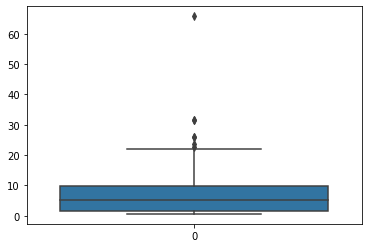

In [5]:
# A boxplot helps us to see the outliers more clearly:

sns.boxplot(wine_df['residual sugar'])

We can see in the above plot that there are a few outliers. There are a number of methods we can use to remove these outliers, the first method we will use is the z-score method.

## Z-Score method for identifying and removing outliers¶

Using this method we are going to identify data points that lie outside of + or - 3 standard deviations of the mean and remove these points form the data. 

In [6]:
# Identifying the values for the upper limit (+3 std) and lower limit (-3 std):

upper_limit = wine_df['residual sugar'].mean() + 3 * wine_df['residual sugar'].std()
lower_limit = wine_df['residual sugar'].mean() - 3 * wine_df['residual sugar'].std()

print("Upper Limit: ", upper_limit)
print("Lower Limit: ", lower_limit)

Upper Limit:  21.60758821525409
Lower Limit:  -8.824758488835164


In [7]:
# Find the outliers, using the above limits:

wine_df.loc[(wine_df['residual sugar'] > upper_limit) | (wine_df['residual sugar'] < lower_limit)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
1547,6.8,0.280,0.40,22.00,0.048,48.0,167.0,1.00100,2.93,0.50,8.7,5,white
1805,6.9,0.270,0.49,23.50,0.057,59.0,235.0,1.00240,2.98,0.47,8.6,5,white
2320,7.8,0.965,0.60,65.80,0.074,8.0,160.0,1.03898,3.39,0.69,11.7,6,white
2505,7.9,0.330,0.28,31.60,0.053,35.0,176.0,1.01030,3.15,0.38,8.8,6,white
2854,6.8,0.280,0.40,22.00,0.048,48.0,167.0,1.00100,2.93,0.50,8.7,5,white
3513,5.9,0.220,0.45,22.60,0.120,55.0,122.0,0.99636,3.10,0.35,12.8,5,white
4017,6.8,0.450,0.28,26.05,0.031,27.0,122.0,1.00295,3.06,0.42,10.6,6,white
4304,6.8,0.450,0.28,26.05,0.031,27.0,122.0,1.00295,3.06,0.42,10.6,6,white
4338,7.9,0.330,0.28,31.60,0.053,35.0,176.0,1.01030,3.15,0.38,8.8,6,white


Now that we have found outliers, we can use one-of-two approaches: trimming or capping.

### Trimming

In [8]:
# trimming - delete the outlier datapoints
# We can do this by creating a new datafile that only includes the data between the upper and lower limits.
# This involves reversing the inequalities used on the above equation to identify outliers. Now we are identifying
# non-outliers and saving to a new dataframe. Note: OR has been changed to &:

new_wine_df = wine_df.loc[(wine_df['residual sugar'] < upper_limit) & (wine_df['residual sugar'] > lower_limit)]

# Next printing the length of the old and new data frame:

print("Before removing outliers: ", len(wine_df))
print("After removing outliers: ", len(new_wine_df))
print("Outliers: ", len(wine_df) - len(new_wine_df))

Before removing outliers:  4898
After removing outliers:  4889
Outliers:  9


<AxesSubplot:>

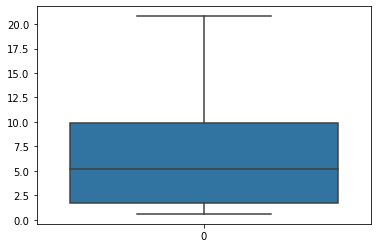

In [9]:
# A boxplot of the data now that the outliers have been removed.
# Note that the y-axis scale is very different and the outlier values are gone. 
sns.boxplot(new_wine_df['residual sugar'])

### Capping

In [10]:
# Capping  - change the outlier values to either the upper or lower limit values.
# Using this method we change the values rather than deleting them. 
# Making a copy of the original data to work with:

wine_df2 = wine_df.copy()

In [11]:
# Replacing outliers that are greater than the upper limit with the upper limit value:

wine_df2.loc[wine_df2['residual sugar'] > upper_limit, 'residual sugar'] = upper_limit
wine_df2.loc[wine_df2['residual sugar'] < lower_limit, 'residual sugar'] = lower_limit

<AxesSubplot:>

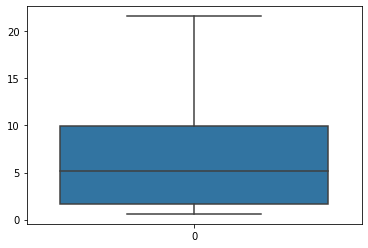

In [12]:
# Checking the boxplot:

sns.boxplot(wine_df2['residual sugar'])

In [13]:
# If we check the length of the new dataframe it should be the same as the original because we have not deleted any rows.
# We have just changed (capped) the values of outliers:

len(wine_df2)

4898

## Inter-quartile Range Method for detecting and removing outliers

Using this method we identify outliers that lie outside 1.5 * IQR. 

In [14]:
# Identifying the quartiles and calculating the IQR:

q1 = wine_df['residual sugar'].quantile(0.25)
q3 = wine_df['residual sugar'].quantile(0.75)

iqr = q3 - q1

q1, q3, iqr

(1.7, 9.9, 8.200000000000001)

In [15]:
# Finding the upper and lower limit:

upper_limit_n = q3 + (1.5 * iqr)
lower_limit_n = q1 - (1.5 * iqr)

lower_limit_n, upper_limit_n

(-10.600000000000001, 22.200000000000003)

<AxesSubplot:>

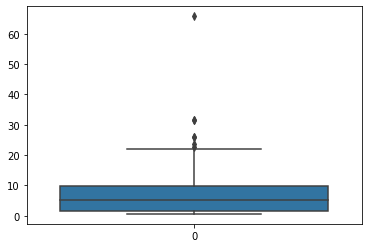

In [16]:
# Plotting the data again so we can see the outliers:
sns.boxplot(wine_df['residual sugar'])

In [17]:
# Find the outliers:

wine_df.loc[(wine_df['residual sugar'] > upper_limit_n) | (wine_df['residual sugar'] < lower_limit_n)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
1805,6.9,0.270,0.49,23.50,0.057,59.0,235.0,1.00240,2.98,0.47,8.6,5,white
2320,7.8,0.965,0.60,65.80,0.074,8.0,160.0,1.03898,3.39,0.69,11.7,6,white
2505,7.9,0.330,0.28,31.60,0.053,35.0,176.0,1.01030,3.15,0.38,8.8,6,white
3513,5.9,0.220,0.45,22.60,0.120,55.0,122.0,0.99636,3.10,0.35,12.8,5,white
4017,6.8,0.450,0.28,26.05,0.031,27.0,122.0,1.00295,3.06,0.42,10.6,6,white
4304,6.8,0.450,0.28,26.05,0.031,27.0,122.0,1.00295,3.06,0.42,10.6,6,white
4338,7.9,0.330,0.28,31.60,0.053,35.0,176.0,1.01030,3.15,0.38,8.8,6,white


### Trimming

Trimming using the IQR method upper and lower limits:

In [18]:
# Trim the data using the upper and lower limits identified by the IQR method:

new_wine_df2 = wine_df.loc[(wine_df['residual sugar'] < upper_limit_n) & (wine_df['residual sugar'] > lower_limit_n)]

# Next printing the length of the old and new data frame:

print("Before removing outliers: ", len(wine_df))
print("After removing outliers: ", len(new_wine_df2))
print("Outliers: ", len(wine_df) - len(new_wine_df2))


Before removing outliers:  4898
After removing outliers:  4891
Outliers:  7


<AxesSubplot:>

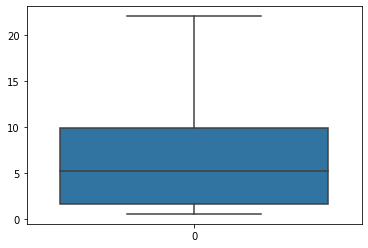

In [19]:
# A boxplot of the data now that the outliers have been removed.
# Note that the y-axis scale is very different and the outlier values are gone. 
sns.boxplot(new_wine_df2['residual sugar'])

### Capping

Capping using the IQR method upper and lower limits:

In [20]:
# Capping  - change the outlier values to either the upper or lower limit values.
# Using this method we change the values rather than deleting them. 
# Making a copy of the original data to work with:

wine_df3 = wine_df.copy()

In [21]:
# Replacing outliers that are greater than the upper limit with the upper limit value:

wine_df3.loc[wine_df3['residual sugar'] > upper_limit_n, 'residual sugar'] = upper_limit
wine_df3.loc[wine_df3['residual sugar'] < lower_limit_n, 'residual sugar'] = lower_limit

<AxesSubplot:>

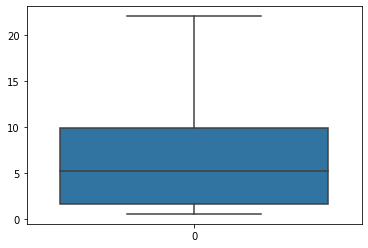

In [22]:
# Checking the boxplot:

sns.boxplot(wine_df3['residual sugar'])

In [23]:
# If we check the length of the new dataframe it should be the same as the original because we have not deleted any rows.
# We have just changed (capped) the values of outliers:

len(wine_df3)

4898

## Percentile Method for removing outliers

In [24]:
# Identfying the new upper and lower limits, setting them at the 1st and 99th percentile:

upper_limit_new = wine_df['residual sugar'].quantile(0.99)
lower_limit_new = wine_df['residual sugar'].quantile(0.01)

print("Upper Limit: ", upper_limit_new)
print("Lower Limit: ", lower_limit_new)

Upper Limit:  18.8
Lower Limit:  0.9


<AxesSubplot:>

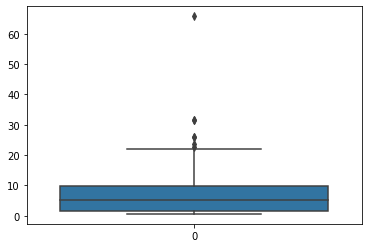

In [25]:
# Boxplot of the original data containing outliers:

sns.boxplot(wine_df['residual sugar'])

In [26]:
# Find the outliers:

wine_df.loc[(wine_df['residual sugar'] > upper_limit_new) | (wine_df['residual sugar'] < lower_limit_new)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
52,6.9,0.19,0.31,19.25,0.043,38.0,167.0,0.99954,2.93,0.52,9.1,7,white
114,7.4,0.28,0.42,19.80,0.066,53.0,195.0,1.00000,2.96,0.44,9.1,5,white
121,5.9,0.17,0.28,0.70,0.027,5.0,28.0,0.98985,3.13,0.32,10.6,5,white
174,8.9,0.27,0.28,0.80,0.024,29.0,128.0,0.98984,3.01,0.35,12.4,6,white
198,6.8,0.30,0.26,20.30,0.037,45.0,150.0,0.99727,3.04,0.38,12.3,6,white
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4784,7.2,0.16,0.32,0.80,0.040,50.0,121.0,0.99220,3.27,0.33,10.0,6,white
4788,6.0,0.21,0.38,0.80,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6,white
4810,6.6,0.28,0.34,0.80,0.037,42.0,119.0,0.98880,3.03,0.37,12.5,6,white
4873,5.8,0.15,0.28,0.80,0.037,43.0,127.0,0.99198,3.24,0.51,9.3,5,white


### Trimming using the percentile method

In [27]:
# Trim the data using the upper and lower limits identified by the percentile method:

new_wine_df3 = wine_df.loc[(wine_df['residual sugar'] < upper_limit_new) & (wine_df['residual sugar'] > lower_limit_new)]

# Next printing the length of the old and new data frame:

print("Before removing outliers: ", len(wine_df))
print("After removing outliers: ", len(new_wine_df3))
print("Outliers: ", len(wine_df) - len(new_wine_df3))

Before removing outliers:  4898
After removing outliers:  4775
Outliers:  123


<AxesSubplot:>

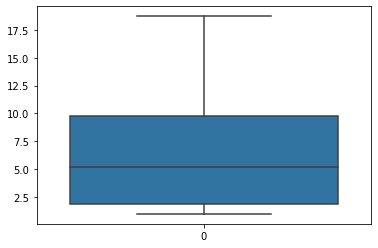

In [28]:
sns.boxplot(new_wine_df3['residual sugar'])

### Capping using the percentile method

In [29]:
# Capping  - change the outlier values to either the upper or lower limit values.
# Using this method we change the values rather than deleting them. 
# Making a copy of the original data to work with:

wine_df4 = wine_df.copy()

In [30]:
# Replacing outliers that are greater than the upper limit with the upper limit value:

wine_df4.loc[wine_df4['residual sugar'] > upper_limit_new, 'residual sugar'] = upper_limit_new
wine_df4.loc[wine_df4['residual sugar'] < lower_limit_new, 'residual sugar'] = lower_limit_new

<AxesSubplot:>

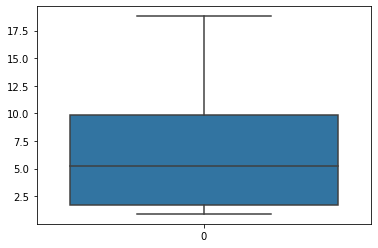

In [31]:
# Checking the boxplot:

sns.boxplot(wine_df4['residual sugar'])

In [32]:
# If we check the length of the new dataframe it should be the same as the original because we have not deleted any rows.
# We have just changed (capped) the values of outliers:

len(wine_df4)

4898